# 互评作业1
## Consumer & Visitor Insights For Neighborhoods数据预处理

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from math import ceil

In [3]:
data = pd.read_csv("../data/archive/cbg_patterns.csv")
data.head()

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
0,1.005951e+10,1538352000,1541030400,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10..."
1,1.009051e+10,1538352000,1541030400,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12..."
2,1.047957e+10,1538352000,1541030400,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
3,1.069040e+10,1538352000,1541030400,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17..."
4,1.073011e+10,1538352000,1541030400,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550..."


(array([5.2225e+04, 8.4020e+03, 4.4100e+03, 2.8990e+03, 1.6890e+03,
        7.1000e+02, 1.7800e+02, 3.8000e+01, 5.0000e+00, 1.0000e+00]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <a list of 10 Patch objects>)

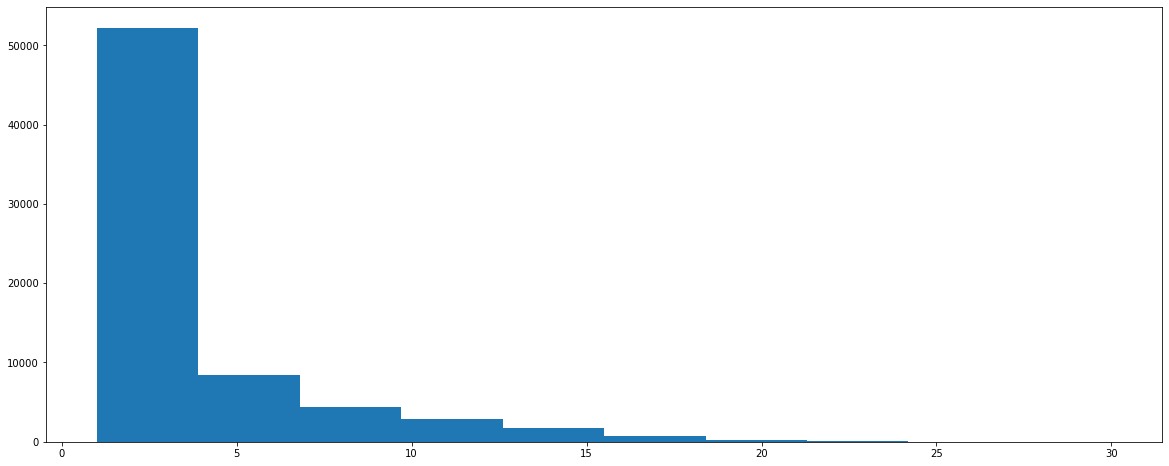

In [4]:
#统计distance_from_home一列每个可能聚会的频数
distance = data.distance_from_home.value_counts()
plt.figure(figsize=(20, 8))
plt.hist(distance)

In [5]:
#给出raw_visit_count一列的五数概括
data.raw_visit_count.describe()

count    2.206290e+05
mean     4.793066e+04
std      6.252655e+04
min      6.000000e+01
25%      1.704200e+04
50%      3.064000e+04
75%      5.667800e+04
max      7.179900e+06
Name: raw_visit_count, dtype: float64

In [6]:
print(data.isnull().sum()) #统计每一列缺失值的个数

census_block_group            1
date_range_start              0
date_range_end                0
raw_visit_count             106
raw_visitor_count           106
visitor_home_cbgs             0
visitor_work_cbgs             0
distance_from_home          217
related_same_day_brand        0
related_same_month_brand      0
top_brands                    0
popularity_by_hour            0
popularity_by_day             0
dtype: int64


In [7]:
#对于census_block_group缺失的数据，由于census_block_group是人口普查区组唯一的12位FIPS码，无法进行填补，故选择直接将该行数据剔除
data[data['census_block_group'].isnull()]  #索引为220734

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
220734,NaN,1538352000,1541030400,NaN,NaN,{},{},NaN,[],[],[],[],{}


In [8]:
data.drop(220734,inplace=True)#将索引为220734的数据剔除
#对于raw_visit_count和raw_visitor_count两列的缺失值，分别使用他们的均值进行填充
raw_visit_count_mean = np.ceil( np.mean(data.raw_visit_count) )
data.raw_visit_count = data.raw_visit_count.fillna(raw_visit_count_mean)
raw_visitor_count_mean = np.ceil( np.mean(data.raw_visitor_count) )
data.raw_visitor_count = data.raw_visitor_count.fillna(raw_visitor_count_mean)
#对于distance_from_home一列使用最高频率值来填补缺失值
data.distance_from_home.value_counts()

8345.0      30
8198.0      27
7422.0      27
8073.0      27
8337.0      25
            ..
57053.0      1
142012.0     1
29289.0      1
191089.0     1
188528.0     1
Name: distance_from_home, Length: 70557, dtype: int64

In [9]:
data.distance_from_home = data.distance_from_home.fillna(8345.0) #使用最高频率值进行填充
#至此所有缺失值填补完毕
print(data.isnull().sum())

census_block_group          0
date_range_start            0
date_range_end              0
raw_visit_count             0
raw_visitor_count           0
visitor_home_cbgs           0
visitor_work_cbgs           0
distance_from_home          0
related_same_day_brand      0
related_same_month_brand    0
top_brands                  0
popularity_by_hour          0
popularity_by_day           0
dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x18ac4452c08>,
 'caps': [<matplotlib.lines.Line2D at 0x18ac4459e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x18ac4452a48>],
 'medians': [<matplotlib.lines.Line2D at 0x18ac445cf08>],
 'fliers': [<matplotlib.lines.Line2D at 0x18ac32565c8>],
 'means': []}

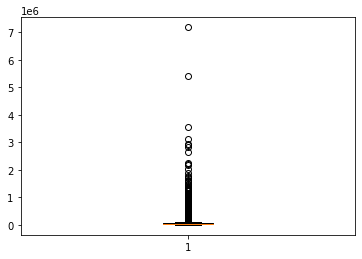

In [10]:
#绘制盒图
plt.boxplot(data.raw_visit_count)

(array([ 3972.,  4178., 25359.,  3532.,  3159., 11892.,  5533.,  1836.,
        14505.,  4981.,  6756.,  4359.,  6434., 11520.,  6670.,  2475.,
         2758.,  7769., 21618.,  9810.,  5599.,  9740.,  3874.,  4779.,
        17501.,  2176.,  3678.,  6375.,  4899.,     0.,    41.,     0.,
            0.,   218.,     0.,    55.,  2594.,     0.,     0.,    89.]),
 array([1.00102010e+10, 2.92676935e+10, 4.85251860e+10, 6.77826784e+10,
        8.70401709e+10, 1.06297663e+11, 1.25555156e+11, 1.44812648e+11,
        1.64070141e+11, 1.83327633e+11, 2.02585126e+11, 2.21842618e+11,
        2.41100111e+11, 2.60357603e+11, 2.79615096e+11, 2.98872588e+11,
        3.18130081e+11, 3.37387573e+11, 3.56645066e+11, 3.75902558e+11,
        3.95160051e+11, 4.14417543e+11, 4.33675035e+11, 4.52932528e+11,
        4.72190020e+11, 4.91447513e+11, 5.10705005e+11, 5.29962498e+11,
        5.49219990e+11, 5.68477483e+11, 5.87734975e+11, 6.06992468e+11,
        6.26249960e+11, 6.45507453e+11, 6.64764945e+11, 6.8402

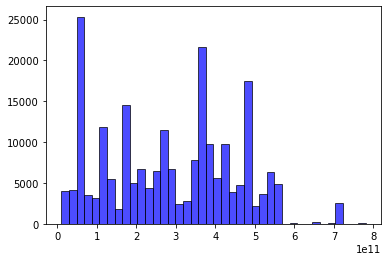

In [11]:
#绘制直方图
plt.hist(data.census_block_group, bins=40, facecolor="blue", edgecolor="black", alpha=0.7)

##  wine-reviews数据预处理

In [2]:
data1 = pd.read_csv("../data/archive/winemag-data_first150k.csv",encoding="utf-8")[["country", "points", "price", "province", "variety", "winery"]]
data2 = pd.read_csv("../data/archive/winemag-data-130k-v2.csv",encoding="utf-8")[["country", "points", "price", "province", "taster_name", "variety", "winery"]]

print("winemag-data_first150k.csv标称属性有country，province，variety，winery")
print("winemag-data-130k-v2.csv标称属性有country，province，taster_name，variety，winery")

winemag-data_first150k.csv标称属性有country，province，variety，winery
winemag-data-130k-v2.csv标称属性有country，province，taster_name，variety，winery


In [3]:
def fiveNumber(nums):
    #五数概括 Minimum、Q1、Median、Q3、Maximum
    Minimum=min(nums)
    Maximum=max(nums)
    Q1=np.percentile(nums,25)
    Median=np.median(nums)
    Q3=np.percentile(nums,75)
    
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR #下限值
    upper_limit=Q3+1.5*IQR #上限值
    
    return Minimum,Q1,Median,Q3,Maximum

print("数值属性有points和price")
d = pd.DataFrame(data=data1[["price"]])#price属性有空值,转成DataFrame格式处理该空值
d=d.dropna(axis=0, how='any')
d=d.values
d=d.flatten()
m=fiveNumber(d)
points_five1=fiveNumber(data1[["points"][0]])
print("Wine/winemag-data_first150k.csv：\npoints缺省值数量："+str(data1[["points"]].isnull().sum()[0])+\
      "；五数概括："+str(points_five1)+"\nprice缺省值数量："+str(data1[["price"]].isnull().sum()[0])+"；五数概括："+str(m))

d2 = pd.DataFrame(data=data2[["price"]])
d2=d2.dropna(axis=0, how='any')
keep2=d2
d2=d2.values
d2=d2.flatten()
m2=fiveNumber(d2)
points_five2=fiveNumber(data2[["points"][0]])
print("Wine/winemag-data-130k-v2.csv：\npoints缺省值数量："+str(data2[["points"]].isnull().sum()[0])+\
      "；五数概括："+str(points_five2)+"\nprice缺省值数量："+str(data2[["price"]].isnull().sum()[0])+"；五数概括："+str(m2))

数值属性有points和price
Wine/winemag-data_first150k.csv：
points缺省值数量：0；五数概括：(80, 86.0, 88.0, 90.0, 100)
price缺省值数量：13695；五数概括：(4.0, 16.0, 24.0, 40.0, 2300.0)
Wine/winemag-data-130k-v2.csv：
points缺省值数量：0；五数概括：(80, 86.0, 88.0, 91.0, 100)
price缺省值数量：8996；五数概括：(4.0, 17.0, 25.0, 42.0, 3300.0)


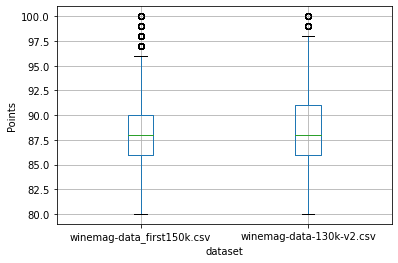

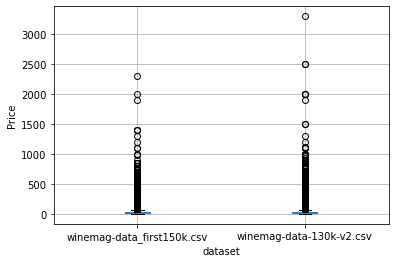

In [4]:
#point

point_box = pd.DataFrame({"winemag-data_first150k.csv":data1[["points"][0]],
                     "winemag-data-130k-v2.csv":data2[["points"][0]]})
point_box.boxplot()
plt.ylabel("Points")
plt.xlabel("dataset")
plt.show()

price_box = pd.DataFrame({"winemag-data_first150k.csv":data1[["price"][0]],
                     "winemag-data-130k-v2.csv":data2[["price"][0]]})
price_box.boxplot()
plt.ylabel("Price")
plt.xlabel("dataset")
plt.show()
point1_out=[]
point2_out=[]
#离群点函数
def outpoint(data,point3,point1):
    out=[]
    for i in range(len(data)):
        if (data[i]>(point3+1.5*(point3-point1))or\
           data[i]<(point1-1.5*(point3-point1))):
               out.append(data[i])
    return out

Points' Histogram:


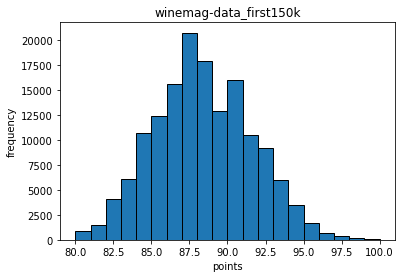

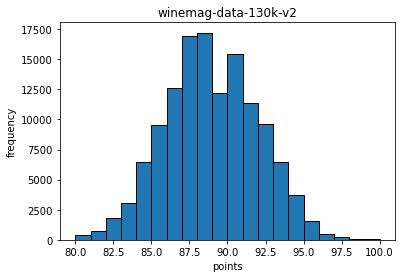

In [5]:
print("Points' Histogram:")#度数直方图
plt.show()
plt.hist(data1[["points"][0]], bins=20,  edgecolor = 'black',\
         histtype='bar', align='mid', orientation='vertical')
plt.xlabel('points')
plt.ylabel('frequency')
plt.title('winemag-data_first150k')
plt.show()
plt.hist(data2[["points"][0]], bins=20,  edgecolor = 'black',\
         histtype='bar', align='mid', orientation='vertical')
plt.xlabel('points')
plt.ylabel('frequency')
plt.title('winemag-data-130k-v2')
plt.show()

Points' Histogram:


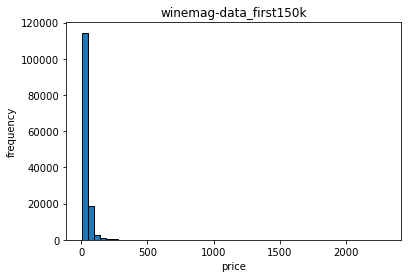

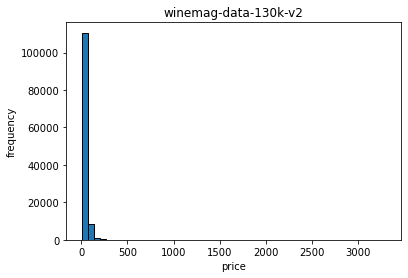

In [6]:
print("Points' Histogram:")#度数直方图

plt.hist(d, bins=50,  edgecolor = 'black',\
         histtype='bar', align='mid', orientation='vertical')
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('winemag-data_first150k')
plt.show()
plt.hist(d2, bins=50,  edgecolor = 'black',\
         histtype='bar', align='mid', orientation='vertical')
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('winemag-data-130k-v2')
plt.show()

In [7]:
print("缺失的数据为price数据：")
num_grapes = data1[ ["country","price", "variety"] ]
num_grapes=num_grapes[num_grapes['price'].isnull()]
num_country=num_grapes.groupby(by="country").count().sort_values(by="variety")[::-1]
num_variety=num_grapes.groupby(by="variety").count().sort_values(by="country")[::-1]
num_grapes2 = data2[ ["country","price", "variety"] ]
num_grapes2=num_grapes2[num_grapes2['price'].isnull()]
num_country2=num_grapes2.groupby(by="country").count().sort_values(by="variety")[::-1]
num_variety2=num_grapes2.groupby(by="variety").count().sort_values(by="country")[::-1]
print(num_country)
print(num_variety)

缺失的数据为price数据：
              price  variety
country                     
France            0     6313
Italy             0     4694
Portugal          0     1146
Austria           0      574
US                0      258
New Zealand       0      250
Spain             0      108
Germany           0      105
Australia         0       63
Chile             0       50
Argentina         0       44
South Africa      0       21
Israel            0       20
Slovenia          0       13
Greece            0       12
Uruguay           0        7
Croatia           0        6
Egypt             0        3
Canada            0        2
Tunisia           0        2
Turkey            0        2
England           0        1
Hungary           0        1
                            country  price
variety                                   
Bordeaux-style Red Blend       2802      0
Nebbiolo                        712      0
Chardonnay                      707      0
Red Blend                       684      0
Bo

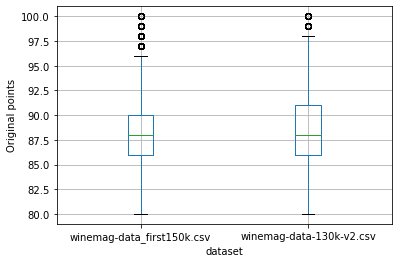

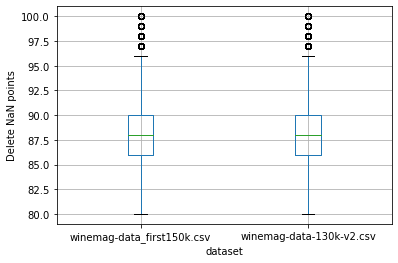

In [9]:
#绘图函数
def hist(d,bin,x,y,t):
    plt.hist(d, bins=bin,  edgecolor = 'black',\
         histtype='bar', align='mid', orientation='vertical')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()
def box(data1,data2,y):
    box = pd.DataFrame({"winemag-data_first150k.csv":data1,
                         "winemag-data-130k-v2.csv":data2})
    box.boxplot()
    plt.ylabel(y)
    plt.xlabel("dataset")
    plt.show()

#剔除缺失值

data1_1=data1
data2_1=data2
data1_1=data1_1.dropna(axis=0, how='any')
data1_2=data1_1.dropna(axis=0, how='any')
box(data1[["points"][0]],data2[["points"][0]],'Original points')
box(data1_1[["points"][0]],data1_2[["points"][0]],'Delete NaN points')

winemag-data_first150k.csv:20.0


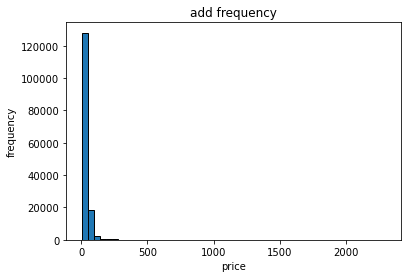

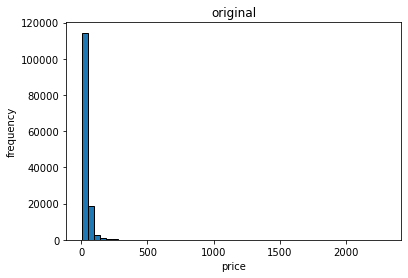

可以看其五数概括变化:

(4.0, 16.0, 22.0, 38.0, 2300.0)

其均值和Q3从原来24，40变成了22，38


winemag-data-130k-v2.csv:20.0


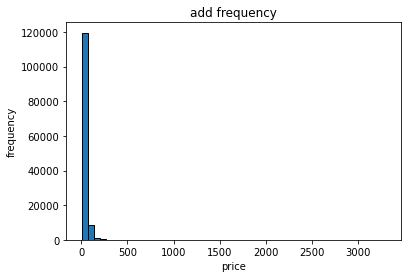

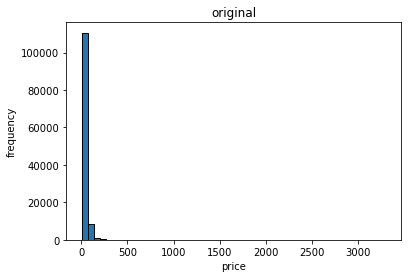

其五数概括变化:

(4.0, 18.0, 25.0, 40.0, 3300.0)

其Q1和Q3从原来17，42变成了18，40


In [10]:
#高频值填充
frequency1=data1[["price"][0]].mode()
frequency2=data2[["price"][0]].mode()
data2_1=data1[["price"][0]].fillna(frequency1[0])
data2_2=data2[["price"][0]].fillna(frequency2[0])
print("winemag-data_first150k.csv:"+str(frequency1[0]))
hist(data2_1,50,"price","frequency","add frequency")
hist(d,50,"price","frequency","original")
print("可以看其五数概括变化:\n")
print(fiveNumber(data2_1))
print("\n其均值和Q3从原来24，40变成了22，38")

print("\n\nwinemag-data-130k-v2.csv:"+str(frequency2[0]))
hist(data2_2,50,"price","frequency","add frequency")
hist(d2,50,"price","frequency","original")
print("其五数概括变化:\n")
print(fiveNumber(data2_2))
print("\n其Q1和Q3从原来17，42变成了18，40")

In [11]:
#对象之间的相似性填充
data3_1=data1
data3_2=data2
data3_3=data3_1[data3_1["country"]=="France"]
data3_4=data3_1[data3_1["country"]=="Italy"]
data3_3=data3_3.dropna(axis=0, how='any')
data3_4=data3_4.dropna(axis=0, how='any')

data3_5=data3_2[data3_2["country"]=="France"]
data3_6=data3_2[data3_2["country"]=="Italy"]
data3_5=data3_5.dropna(axis=0, how='any')
data3_6=data3_6.dropna(axis=0, how='any')
#print(data3_3)
frequency_France1=data3_3["price"].mode()
frequency_Italy1=data3_4["price"].mode()

frequency_France2=data3_5["price"].mode()
frequency_Italy2=data3_6["price"].mode()
print("winemag-data_first150k.csv: France mode:"+str(frequency_France1[0])+"  Italy mode:"+str(frequency_Italy1[0]))
print("winemag-data-130k-v2.csv: France mode:"+str(frequency_France2[0])+"  Italy mode:"+str(frequency_Italy2[0]))

winemag-data_first150k.csv: France mode:20.0  Italy mode:20.0
winemag-data-130k-v2.csv: France mode:20.0  Italy mode:20.0


winemag-data_first150k.csv: PLCC=0.4598685797755388  Cosine similarity=[0.68591622]
winemag-data-130k-v2.csv: PLCC=0.4040017582872983  Cosine similarity=[0.64080925]


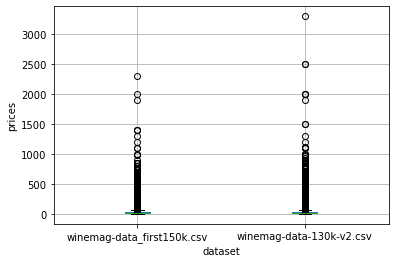

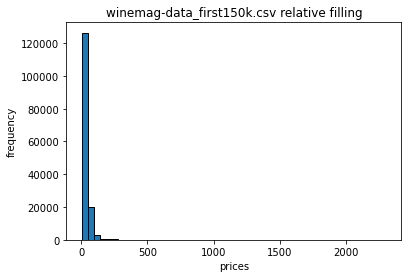

winemag-data_first150k.csv属性相关填充后五数概括(4.0, 16.0, 24.0, 40.0, 2300.0)


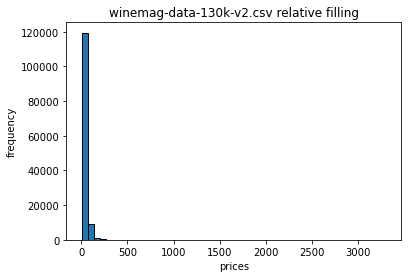

winemag-data-130k-v2.csv属性相关填充后五数概括(4.0, 17.0, 25.0, 41.0, 3300.0)


In [12]:
#属性间的相关性填充，由于数值只有point和price，以这两者考虑相似性
data4_1=data1
data4_2=data2
data4_1=data4_1.dropna(axis=0, how='any')
data4_2=data4_2.dropna(axis=0, how='any')
points1=data4_1["points"]
price1=data4_1["price"]
points2=data4_2["points"]
price2=data4_2["price"]
cos1 = np.vstack([points1,price1])
p1 = 1 - pdist(cos1,'cosine')
cos2 = np.vstack([points2,price2])
p2 = 1 - pdist(cos2,'cosine')
print("winemag-data_first150k.csv: PLCC="+str(points1.corr(price1,method="pearson"))+"  Cosine similarity="+str(p1))
print("winemag-data-130k-v2.csv: PLCC="+str(points2.corr(price2,method="pearson"))+"  Cosine similarity="+str(p2))

#以每个度数的中值来填充结果
xx = data1[[ "points", "price"]].groupby(by="points").median()
xx=xx.values
xx=xx.flatten()
yy = data1[[ "points", "price"]].groupby(by="points").median()
yy=yy.values
yy=yy.flatten()

data_add1=data1
data_add2=data2
dataadd_g1=pd.DataFrame()
dataadd_g2=pd.DataFrame()
for i in range(80,101):
    data_ad1=data_add1.loc[data_add1['points'].isin([i])].fillna(xx[i-80])
    data_ad2=data_add2.loc[data_add1['points'].isin([i])].fillna(yy[i-80])
    if(i==80):
        data_add_g1=data_ad1
        data_add_g2=data_ad2
    else:
        data_add_g1=pd.concat([data_add_g1,data_ad1],axis=0)
        data_add_g2=pd.concat([data_add_g2,data_ad2],axis=0)
prices1=data_add_g1[["price"][0]]
prices2=data_add_g2[["price"][0]]
box(prices1,prices2,"prices")
hist(prices1,50,"prices","frequency","winemag-data_first150k.csv relative filling")
print("winemag-data_first150k.csv属性相关填充后五数概括"+str(fiveNumber((prices1.values).flatten())))
hist(prices2,50,"prices","frequency","winemag-data-130k-v2.csv relative filling")
print("winemag-data-130k-v2.csv属性相关填充后五数概括"+str(fiveNumber((prices2.values).flatten())))